In [1]:
# Matthew - Testing Data ML project

# imports
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

In [2]:
df = pd.read_csv(Path("wr_data.csv"))
df

,player,player_id,position,team_name,player_game_count,avg_depth_of_target,avoided_tackles,caught_percent,contested_catch_rate,contested_receptions,...,targeted_qb_rating,targets,touchdowns,wide_rate,wide_snaps,yards,yards_after_catch,yards_after_catch_per_reception,yards_per_reception,yprr
0,CeeDee Lamb,61570,WR,DAL,18,10.4,20,73.1,36.7,11,...,118.4,197,12,40.3,299,1859,709,4.9,12.9,2.69
1,Amon-Ra St. Brown,84470,WR,DET,19,8.0,21,74.2,51.7,15,...,115.9,190,11,43.6,316,1789,802,5.7,12.7,2.59
2,Stefon Diggs,9579,WR,BUF,19,10.6,21,66.9,41.9,13,...,93.4,175,8,63.1,444,1256,460,3.9,10.7,1.89
3,Tyreek Hill,10799,WR,MIA,17,11.3,28,70.9,30.4,7,...,120.2,175,14,60.5,315,1861,689,5.6,15.0,3.72
4,Davante Adams,8688,WR,LV,17,11.1,8,60.2,35.3,12,...,81.1,171,8,82.0,496,1144,337,3.3,11.1,1.97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
481,Brandin Echols,98900,CB,NYJ,1,9.0,0,100.0,NaN,0,...,118.8,1,0,0.0,0,18,9,9.0,18.0,18.00
482,Malcolm Rodriguez,60731,LB,DET,4,6.0,0,100.0,NaN,0,...,91.7,1,0,10.0,1,6,0,0.0,6.0,1.20
483,Cody Thompson,48152,WR,SEA,6,7.0,0,100.0,NaN,0,...,108.3,1,0,85.7,6,10,3,3.0,10.0,1.43
484,Sam Howell,97599,QB,WAS,17,1.0,0,100.0,NaN,0,...,83.3,1,0,0.0,0,4,3,3.0,4.0,4.00


In [3]:
df.isnull().sum()

player                               0
player_id                            0
position                             0
team_name                            0
player_game_count                    0
avg_depth_of_target                  0
avoided_tackles                      0
caught_percent                       0
contested_catch_rate               143
contested_receptions                 0
contested_targets                    0
declined_penalties                   0
drop_rate                           16
drops                                0
first_downs                          0
franchise_id                         0
fumbles                              0
grades_hands_drop                   20
grades_hands_fumble                 13
grades_offense                       0
grades_pass_block                  148
grades_pass_route                    1
inline_rate                          0
inline_snaps                         0
interceptions                        0
longest                  

In [4]:
df.dtypes

player                              object
player_id                            int64
position                            object
team_name                           object
player_game_count                    int64
avg_depth_of_target                float64
avoided_tackles                      int64
caught_percent                     float64
contested_catch_rate               float64
contested_receptions                 int64
contested_targets                    int64
declined_penalties                   int64
drop_rate                          float64
drops                                int64
first_downs                          int64
franchise_id                         int64
fumbles                              int64
grades_hands_drop                  float64
grades_hands_fumble                float64
grades_offense                     float64
grades_pass_block                  float64
grades_pass_route                  float64
inline_rate                        float64
inline_snap

In [5]:
# Cleaning Data
df_wr = df[df['position'] == "WR"]
df_wr = df_wr[df_wr["routes"] > 200]

df_wr = df_wr[["yards", "player", "player_id", "player_game_count", "avg_depth_of_target", "avoided_tackles", "caught_percent", "contested_catch_rate",               
"contested_receptions", "contested_targets", "drop_rate", "drops", "fumbles", "pass_plays", "receptions", "route_rate", "routes", "slot_rate",
"slot_snaps", "targeted_qb_rating", "targets", "touchdowns", "wide_rate", "wide_snaps", "yards_after_catch", "yards_after_catch_per_reception",
"yards_per_reception", "yprr"]]

In [6]:
df_wr

,yards,player,player_id,player_game_count,avg_depth_of_target,avoided_tackles,caught_percent,contested_catch_rate,contested_receptions,contested_targets,...,slot_snaps,targeted_qb_rating,targets,touchdowns,wide_rate,wide_snaps,yards_after_catch,yards_after_catch_per_reception,yards_per_reception,yprr
0,1859,CeeDee Lamb,61570,18,10.4,20,73.1,36.7,11,30,...,435,118.4,197,12,40.3,299,709,4.9,12.9,2.69
1,1789,Amon-Ra St. Brown,84470,19,8.0,21,74.2,51.7,15,29,...,401,115.9,190,11,43.6,316,802,5.7,12.7,2.59
2,1256,Stefon Diggs,9579,19,10.6,21,66.9,41.9,13,31,...,251,93.4,175,8,63.1,444,460,3.9,10.7,1.89
3,1861,Tyreek Hill,10799,17,11.3,28,70.9,30.4,7,23,...,195,120.2,175,14,60.5,315,689,5.6,15.0,3.72
4,1144,Davante Adams,8688,17,11.1,8,60.2,35.3,12,34,...,102,81.1,171,8,82.0,496,337,3.3,11.1,1.97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
224,154,Quez Watkins,61664,9,10.4,1,72.0,57.1,4,7,...,146,67.8,25,1,38.9,93,66,3.7,8.6,0.68
228,155,Donovan Peoples-Jones,61439,17,11.5,2,54.2,100.0,1,1,...,90,39.4,24,0,68.5,196,34,2.6,11.9,0.59
258,162,Lil'Jordan Humphrey,42247,17,9.9,3,65.0,50.0,1,2,...,154,129.6,20,3,34.3,83,98,7.5,12.5,0.73
262,169,Olamide Zaccheaus,44920,18,12.5,0,57.9,40.0,2,5,...,233,122.5,19,2,32.9,115,54,4.9,15.4,0.50


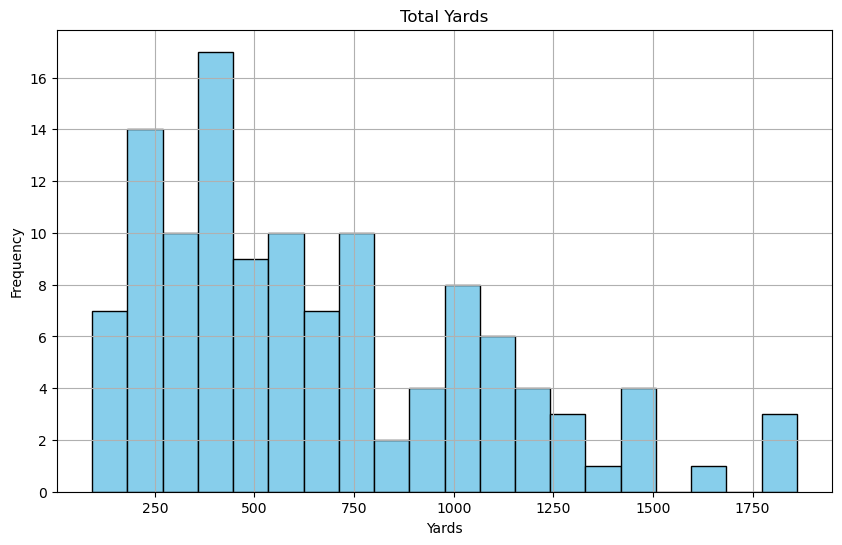

In [7]:
plt.figure(figsize=(10, 6))
plt.hist(df_wr['yards'], bins=20, color='skyblue', edgecolor='black')  # Adjust the number of bins as needed
plt.title('Total Yards')
plt.xlabel('Yards')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

<Axes: xlabel='avg_depth_of_target', ylabel='yards'>

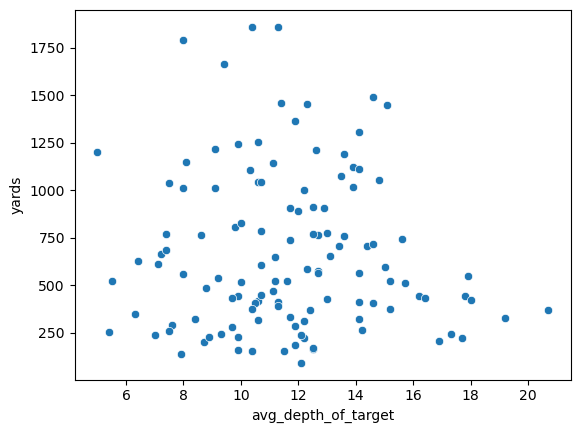

In [8]:
sns.scatterplot(data = df_wr, x = df_wr["avg_depth_of_target"], y = df_wr["yards"]) 

In [9]:
corr_matrix = df_wr.corr()

corr_matrix["yards"].sort_values(ascending=False)

C:\Users\nj06gres\AppData\Local\Temp\ipykernel_11184\159593170.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df_wr.corr()


yards                              1.000000
receptions                         0.952243
targets                            0.946463
yards_after_catch                  0.882393
yprr                               0.880586
touchdowns                         0.811361
contested_targets                  0.757748
routes                             0.756633
pass_plays                         0.751946
avoided_tackles                    0.716227
contested_receptions               0.713504
drops                              0.604206
wide_snaps                         0.592676
targeted_qb_rating                 0.424779
fumbles                            0.414440
caught_percent                     0.391342
player_game_count                  0.328519
yards_after_catch_per_reception    0.293298
slot_snaps                         0.288617
yards_per_reception                0.268529
wide_rate                          0.142095
contested_catch_rate               0.098563
route_rate                      

<Axes: xlabel='touchdowns', ylabel='yards'>

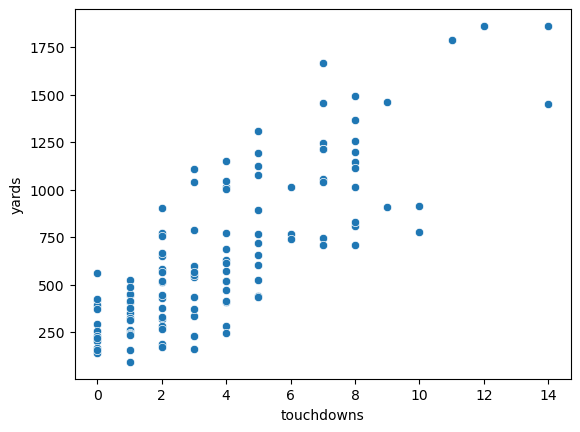

In [10]:
sns.scatterplot(data = df_wr, x = df_wr["touchdowns"], y = df_wr["yards"]) 

<Axes: xlabel='receptions', ylabel='yards'>

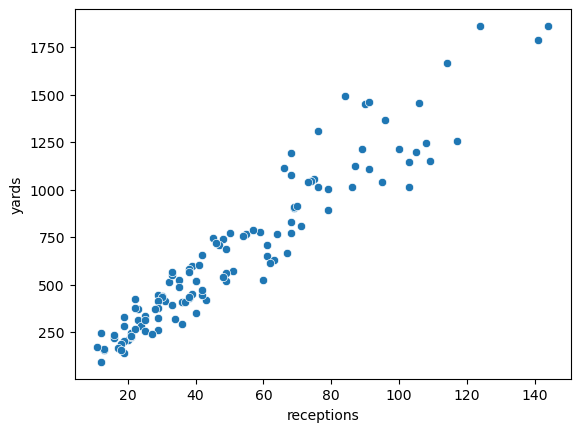

In [11]:
sns.scatterplot(data = df_wr, x = df_wr["receptions"], y = df_wr["yards"]) 

In [16]:
# Training linear model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

x = df_wr[["player_game_count",  "avoided_tackles", "caught_percent",               
"contested_receptions", "contested_targets",  "drops", "fumbles", "pass_plays", "receptions",  "routes", 
"slot_snaps", "targeted_qb_rating", "targets", "touchdowns",  "wide_snaps", "yards_after_catch_per_reception",
"yards_per_reception", "yprr"]]
y = df_wr["yards"]

# Scaling the Data
from sklearn.preprocessing import StandardScaler



X_train, X_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 42)

std_scaler = StandardScaler()
X_train_scaled = std_scaler.fit_transform(X_train)

X_test_scaled = std_scaler.transform(X_test)


lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train)
lin_reg.intercept_, lin_reg.coef_

y_predict = lin_reg.predict(X_test_scaled)
y_predict

array([ 815.234427  ,  412.59576433, 1184.15785945,  765.61771053,
       1068.8879166 ,  439.68526013,  596.93183816, 1250.20565717,
        804.08124169,  466.73954679, 1243.82507157,  541.5398207 ,
       1225.60883744, 1106.8495914 ,  567.77699872,  188.81282347,
         98.74396828, 1734.4632088 ,  329.7848338 ,  305.29866555,
        545.4893894 ,  689.82725708,  943.24093863,  661.83355295,
        694.12624569, 1084.8537396 , 1014.91176836,    8.1245839 ,
        710.37587573,  230.70150151,  909.5913948 ,  412.54353775,
       1147.5109658 ,  280.57544357,  767.40120885,  -11.50009252])

In [17]:
from sklearn.metrics import mean_squared_error

val_error = mean_squared_error(y_test, y_predict, squared = False)
val_error

57.04680631264226

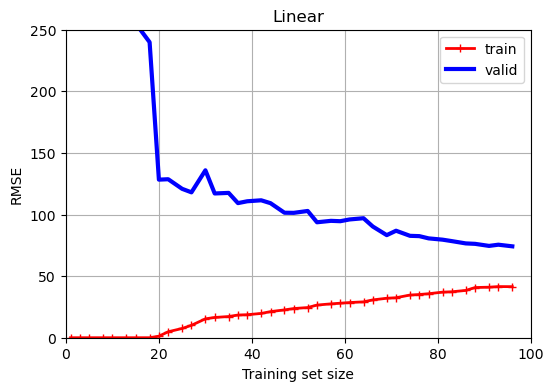

In [18]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import learning_curve

train_sizes, train_scores, valid_scores = learning_curve(
    LinearRegression(), x, y, train_sizes=np.linspace(0.01, 1.0, 40), cv=5,
    scoring="neg_root_mean_squared_error")
train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)

plt.figure(figsize=(6, 4))  # extra code – not needed, just formatting
plt.plot(train_sizes, train_errors, "r-+", linewidth=2, label="train")
plt.plot(train_sizes, valid_errors, "b-", linewidth=3, label="valid")

# extra code – beautifies and saves Figure 4–15
plt.xlabel("Training set size")
plt.ylabel("RMSE")
plt.grid()
plt.legend(loc="upper right")
plt.axis([0, 100, 0, 250])

plt.title("Linear")
plt.show()


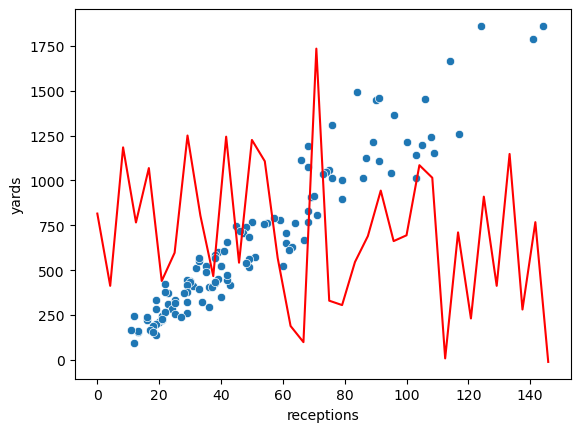

In [19]:

#plt.plot(
xstop = 150

Z = np.arange(0,xstop,xstop/len(y_predict))

sns.scatterplot(data = df_wr, x = df_wr["receptions"], y = df_wr["yards"]) 
plt.plot(Z,y_predict, "r-")

In [20]:
len(x)

120

In [21]:
len(X_train)

84

In [22]:
len(y_predict)

36

In [23]:
from sklearn.tree import DecisionTreeRegressor

In [26]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [30]:
std_scaler = StandardScaler()
X_train_scaled = std_scaler.fit_transform(X_train)

X_test_scaled = std_scaler.transform(X_test)


decision_tree_regressor = DecisionTreeRegressor(random_state=42)
decision_tree_regressor.fit(X_train_scaled, y_train)

predictions = decision_tree_regressor.predict(X_test_scaled)

In [32]:
tree_val_error = mean_squared_error(y_test, predictions, squared=False)
tree_val_error

125.22629516199862

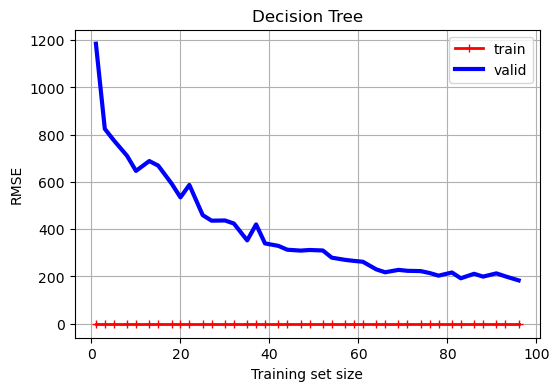

In [152]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import learning_curve

train_sizes, train_scores, valid_scores = learning_curve(
    DecisionTreeRegressor(), x, y, train_sizes=np.linspace(0.01, 1.0, 40), cv=5,
    scoring="neg_root_mean_squared_error")
train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)

plt.figure(figsize=(6, 4))  # extra code – not needed, just formatting
plt.plot(train_sizes, train_errors, "r-+", linewidth=2, label="train")
plt.plot(train_sizes, valid_errors, "b-", linewidth=3, label="valid")

# extra code – beautifies and saves Figure 4–15
plt.xlabel("Training set size")
plt.ylabel("RMSE")
plt.grid()
plt.legend(loc="upper right")
#plt.axis([0, 100, 0, 250])

plt.title("Decision Tree")
plt.show()


In [33]:
from sklearn.ensemble import RandomForestRegressor

In [34]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

std_scaler = StandardScaler()
X_train_scaled = std_scaler.fit_transform(X_train)

X_test_scaled = std_scaler.transform(X_test)

In [35]:
# Creating a random forest regressor model
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)

In [36]:
# Training the model
random_forest_model.fit(X_train_scaled, y_train)

# Making predictions
predictions = random_forest_model.predict(X_test_scaled)

In [37]:
# Evaluating the model
forest_val_error = mean_squared_error(y_test, predictions, squared=False)
forest_val_error

72.5357665798972

In [38]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import learning_curve

train_sizes, train_scores, valid_scores = learning_curve(
    RandomForestRegressor(), x, y, train_sizes=np.linspace(0.01, 1.0, 40), cv=5,
    scoring="neg_root_mean_squared_error")
train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)

plt.figure(figsize=(6, 4))  # extra code – not needed, just formatting
plt.plot(train_sizes, train_errors, "r-+", linewidth=2, label="train")
plt.plot(train_sizes, valid_errors, "b-", linewidth=3, label="valid")

# extra code – beautifies and saves Figure 4–15
plt.xlabel("Training set size")
plt.ylabel("RMSE")
plt.grid()
plt.legend(loc="upper right")
#plt.axis([0, 100, 0, 250])

plt.title("Random Forest")
plt.show()

KeyboardInterrupt: 

In [39]:
from sklearn.svm import SVR

In [40]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

std_scaler = StandardScaler()
X_train_scaled = std_scaler.fit_transform(X_train)

X_test_scaled = std_scaler.transform(X_test)

In [41]:
svm_regressor = SVR(kernel='rbf')
svm_regressor.fit(X_train_scaled, y_train)

predictions = svm_regressor.predict(X_test_scaled)

In [43]:
svm_val_error = mean_squared_error(y_test, predictions, squared=False)
svm_val_error

443.34006151188555

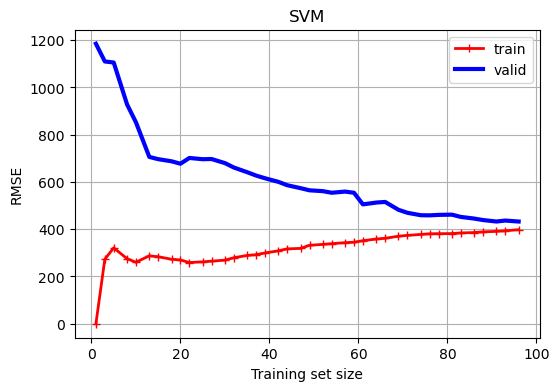

In [154]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import learning_curve

train_sizes, train_scores, valid_scores = learning_curve(
    SVR(), x, y, train_sizes=np.linspace(0.01, 1.0, 40), cv=5,
    scoring="neg_root_mean_squared_error")
train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)

plt.figure(figsize=(6, 4))  # extra code – not needed, just formatting
plt.plot(train_sizes, train_errors, "r-+", linewidth=2, label="train")
plt.plot(train_sizes, valid_errors, "b-", linewidth=3, label="valid")

# extra code – beautifies and saves Figure 4–15
plt.xlabel("Training set size")
plt.ylabel("RMSE")
plt.grid()
plt.legend(loc="upper right")
#plt.axis([0, 100, 0, 250])

plt.title("SVM")
plt.show()

In [103]:
print("LinReg MSE: ", val_error, "\nTree MSE: ", tree_val_error, "\nRandForest MSE: ", forest_val_error, "\nSVM MSE: ", svm_val_error)

LinReg MSE:  46.42314401594072 
Tree MSE:  15376.625 
RandForest MSE:  5104.457066666665 
SVM MSE:  198407.06977806462


In [47]:
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense

ModuleNotFoundError: No module named 'tensorflow'